# Импортируем необходимые библиотеки

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
import tensorflow as tf
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Инициализируем набор данных

In [20]:
df = pd.read_csv("dataset.csv", index_col = 0, delimiter = ',')

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['P_all_power'].values.reshape(-1,1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size-60:, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)), input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=50, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=30, batch_size=32)

test_data = scaled_data[train_size - 60:, : ]

X_test = []
y_test = scaled_data[train_size:, :]  # Actual values

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


Epoch 1/30
257/257 [==============================] - 36s 115ms/step - loss: 1.9955
Epoch 2/30
257/257 [==============================] - 33s 130ms/step - loss: 0.8730
Epoch 3/30
257/257 [==============================] - 37s 143ms/step - loss: 0.4445
Epoch 4/30
257/257 [==============================] - 46s 179ms/step - loss: 0.2056
Epoch 5/30
257/257 [==============================] - 39s 151ms/step - loss: 0.0863
Epoch 6/30
257/257 [==============================] - 39s 152ms/step - loss: 0.0347
Epoch 7/30
257/257 [==============================] - 33s 127ms/step - loss: 0.0161
Epoch 8/30
257/257 [==============================] - 31s 120ms/step - loss: 0.0100
Epoch 9/30
257/257 [==============================] - 30s 117ms/step - loss: 0.0084
Epoch 10/30
257/257 [==============================] - 30s 115ms/step - loss: 0.0078
Epoch 11/30
257/257 [==============================] - 29s 112ms/step - loss: 0.0077
Epoch 12/30
257/257 [==============================] - 31s 120ms/step - lo

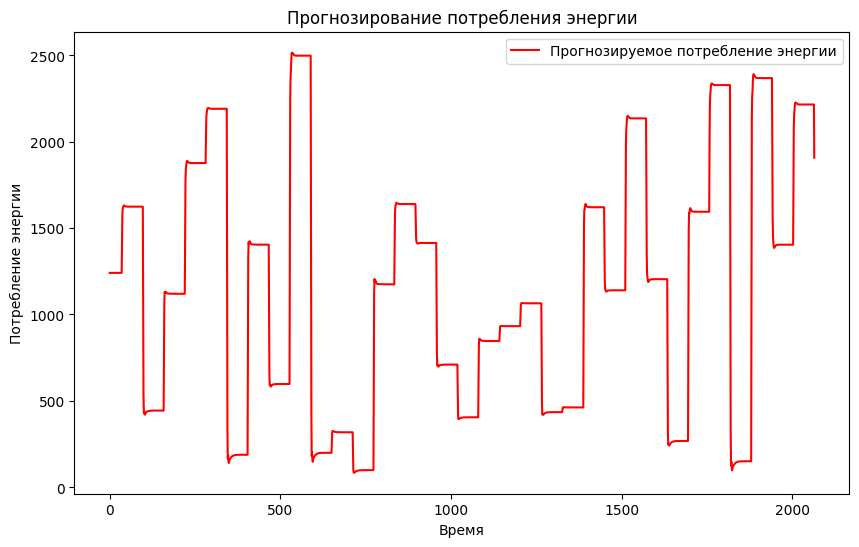

In [22]:
# Инициализация нового графика с определением его размера
plt.figure(figsize=(10,6))

# Добавление на график предсказанных значений потребления энергии
plt.plot(predictions, color='red', label='Прогнозируемое потребление энергии')

# Добавление названия графика
plt.title('Прогнозирование потребления энергии')

# Добавление подписей к осям графика
plt.xlabel('Время')
plt.ylabel('Потребление энергии')

# Добавление легенды на график
plt.legend()

# Отображение графика
plt.show()
